# Graficas

In [18]:
# Importar los paquetes que necesitaremos
import math
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import datetime
import matplotlib.dates as mdates
from scipy.stats import norm

### Histograma

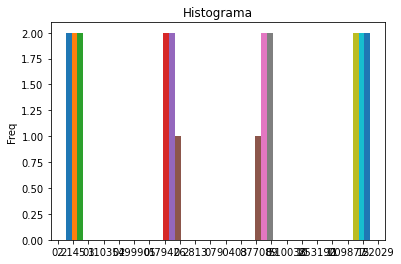

### Graficas de series de tiempo

Se obtiene la cantidad de peticiones exitosas que se le han hecho a un servidor agrupadas por mes a lo largo de 2021

In [4]:
fecha_peticiones = [
	('02', 2145),
	('03', 11035),
	('04', 29990),
	('05', 17942),
	('06', 2813),
	('07', 904),
	('08', 37708),
	('09', 510038),
	('10', 253190),
	('11', 209877),
	('12', 52029)
]

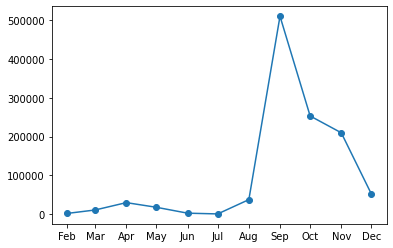

In [7]:
# hay que separar las variables para ambos ejes en listas separadas
fecha = [datetime.datetime.strptime(i[0], '%m') for i in fecha_peticiones]
peticiones = [i[1] for i in fecha_peticiones]
# grafica_serie_tiempo(fecha, peticiones, titulo = 'Uso de una app movil', etiquetay = 'Peticiones al server')

# Set the locator
locator = mdates.MonthLocator() # cada mes
# especificar el formato - %b gives us Jan, Feb...
fmt = mdates.DateFormatter('%b')

plt.plot(fecha, peticiones, 'o-')
X = plt.gca().xaxis
X.set_major_locator(locator)
# Specify formatter
X.set_major_formatter(fmt)
plt.show()
del fecha, peticiones

### Graficas de probabilidad

Se anota el tiempo en minutos que duraron 10 baterias en una laptop:

In [6]:
duracion_baterias = [176, 191, 214, 220, 205, 192, 201, 190, 183, 185]

Creemos que esos tiempos de vida de las baterias se ajustan a una distribucion normal. Para hacer una grafica de probabilidad para probar esta hipotesis, primero ordenamos las observaciones en orden ascendente y calculamos sus frecuencias acumuladas con *(j − 0.5) / n*

In [24]:
# pag 230
n = len(duracion_baterias)
media = np.mean(duracion_baterias)
desv = np.std(duracion_baterias, ddof=1)

d = {'j': [], 'xj': [], 'fa': [], 'zj':[]}
for j, xj in enumerate(sorted(duracion_baterias)):
    fa = ((j+1) - 0.5) / n
    zj = norm.ppf(fa)
    d['j'].append(j+1)
    d['xj'].append(xj)
    d['fa'].append(fa)
    d['zj'].append(zj)
pd.DataFrame(d)

,j,xj,fa,zj
0,1,176,0.05,-1.644854
1,2,183,0.15,-1.036433
2,3,185,0.25,-0.674490
3,4,190,0.35,-0.385320
4,5,191,0.45,-0.125661
5,6,192,0.55,0.125661
6,7,201,0.65,0.385320
7,8,205,0.75,0.674490
8,9,214,0.85,1.036433
9,10,220,0.95,1.644854
